## LDA : Latent Dirichlet Allocation is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

In [1]:
from __future__ import unicode_literals
from nltk.corpus import stopwords
from nltk import stem,pos_tag
import re
from collections import Counter
import numpy as np
from sklearn.cluster import KMeans
%pylab inline
from textblob import TextBlob
from sklearn.metrics import silhouette_score,confusion_matrix,accuracy_score,roc_curve
import pandas as pd
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize,Normalizer
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import ftfy
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from seaborn import lmplot
import os  # for os.path.basename
import matplotlib as mpl
from sklearn.manifold import MDS,TSNE
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD,PCA,NMF
from sklearn.pipeline import make_pipeline
from sklearn.decomposition.online_lda import LatentDirichletAllocation
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/onion8/miniconda3/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['stem']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('dataset/train.csv',encoding='utf-8')

In [160]:
df.head(10)

,Company Name,Exchange:Ticker,Company Type,Company Status,Geographic Locations,Business Description,Industry Classifications,Security Tickers
0,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products (Primary); Consumer Stapl...,OTCPK:EEIG
1,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties (Primary)...",NasdaqGS:FLWS; DB:FWC
2,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",Information Technology (Primary); Internet Sof...,OTCPK:RETC
3,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",Casualty (Primary); Financials (Primary); Fire...,NasdaqGM:PIH
4,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),"1847 Holdings LLC, through its subsidiaries, p...",Commercial and Professional Services (Primary)...,OTCPK:EFSH
5,1867 Western Financial Corporation (OTCPK:WFCL),OTCPK:WFCL,Public Company,Operating,United States of America (Primary),"1867 Western Financial Corporation, through it...",Banks (Primary); Banks (Primary); Diversified ...,OTCPK:WFCL
6,"1mage Software, Inc. (OTCPK:ISOL)",OTCPK:ISOL,Public Company,Operating,United States of America (Primary),1mage Software Inc operates in the technology ...,Application Software (Primary); Information Te...,OTCPK:ISOL
7,"1PM Industries, Inc. (OTCPK:OPMZ)",OTCPK:OPMZ,Public Company,Operating,United States of America (Primary),"1PM Industries, Inc. provides consulting servi...",Commercial and Professional Services (Primary)...,OTCPK:OPMZ
8,1st Capital Bank (OTCPK:FISB),OTCPK:FISB,Public Company,Operating,United States of America (Primary),1st Capital Bank provides various banking prod...,Banks (Primary); Banks (Primary); Financials (...,OTCPK:FISB
9,"1st Colonial Bancorp, Inc. (OTCPK:FCOB)",OTCPK:FCOB,Public Company,Operating,United States of America (Primary),"1st Colonial Bancorp, Inc. operates as the ban...",Banks (Primary); Banks (Primary); Financials (...,OTCPK:FCOB


Only considering Business Description and Industry Classifications as there is no variation in other columns of DF

In [4]:
data = df[['Business Description','Industry Classifications']]

In [10]:
data['label']=data['Industry Classifications'].str.split('(',expand=True)

/Users/onion8/miniconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
rawdata=data

## Grouping data by the labels to visualize the frequency of each label

In [13]:
vis_data=rawdata.groupby('label').size()

In [14]:
vis_data=pd.DataFrame(vis_data,columns=['Frequency'])
vis_data['label']=vis_data.index
vis_data['idx']=(arange(0,len(vis_data)))
vis_data=vis_data.set_index('idx')
vis_data=vis_data.iloc[1:]
vis_data=vis_data.sort_values(by=['Frequency'], ascending=False)


In [18]:
vis_data.head()

,Frequency,label
idx,,
59,241,Banks
185,153,Healthcare
69,145,Biotechnology
175,133,Energy
138,117,Consumer Discretionary


## Visualizing top 5 labels frequency

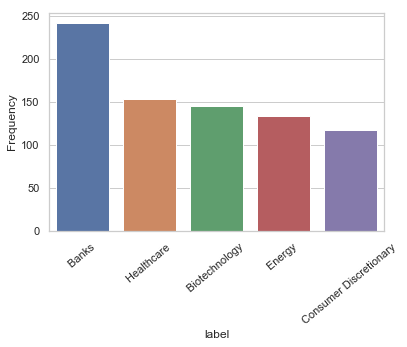

In [15]:
sns.set(style="whitegrid")
ax = sns.barplot(x="label", y="Frequency", data=vis_data.head(5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)

In [20]:
vis_data.tail()

,Frequency,label
idx,,
38,1,Apparel and Textile Distribution
142,1,Cosmetic Dental Implants and Supplies
96,1,Casinos and Gaming
98,1,Casualty Reinsurance Carriers
102,1,Catering Services


## Visualizing last 5 labels frequency

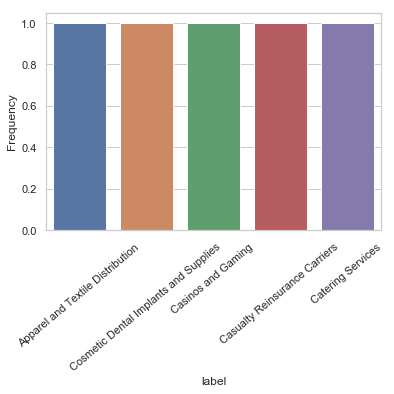

In [21]:
%matplotlib inline
sns.set(style="whitegrid")
ax = sns.barplot(x="label", y="Frequency", data=vis_data.tail(5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)

Data is highly imbalanced as companies of some labels are very less

In [22]:
(vis_data[vis_data['Frequency']>5])

,Frequency,label
idx,,
59,241,Banks
185,153,Healthcare
69,145,Biotechnology
175,133,Energy
138,117,Consumer Discretionary
190,106,Information Technology
89,88,Capital Goods
125,85,Commercial and Professional Services
42,50,Application Software


## Dependencies for LDA and visualization

In [16]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


/Users/onion8/miniconda3/lib/python2.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [24]:
rawdata['Business Description']

0       024 Pharma, Inc. provides healthcare products ...
1       1-800-Flowers.com, Inc., together with its sub...
2       12 Retech Corporation, through its subsidiarie...
3       1347 Property Insurance Holdings, Inc., throug...
4       1847 Holdings LLC, through its subsidiaries, p...
5       1867 Western Financial Corporation, through it...
6       1mage Software Inc operates in the technology ...
7       1PM Industries, Inc. provides consulting servi...
8       1st Capital Bank provides various banking prod...
9       1st Colonial Bancorp, Inc. operates as the ban...
10      1st Constitution Bancorp operates as the bank ...
11      1st NRG Corp. explores, develops, produces, an...
12      1st Prestige Wealth Management provides wealth...
13      1st Source Corporation operates as the bank ho...
14      1ST SUMMIT BANCORP of Johnstown, Inc. operates...
15      RM Investors, Inc. supplies fruits and vegetab...
16      2050 Motors, Inc., a development stage company...
17      22nd C

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/onion8/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Stopwords are extended with other common words in the description

In [47]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['Inc.', 'Company', 'Corporation','inc','inc.'])

In [18]:
print(rawdata['label'].unique())
rawdata.head()

[u'Beauty Care Products ' u'Catalog Flowers, Gifts and Novelties '
 u'Information Technology ' u'Casualty '
 u'Commercial and Professional Services ' u'Banks '
 u'Application Software ' u'Energy '
 u'Asset Management and Custody Banks ' u'Consumer Staples '
 u'Consumer Discretionary ' u'Cigarettes ' u'Healthcare '
 u'Computer and Computer Software Stores '
 u'Application Hosting Services ' u'Industry Specific Electronics '
 u'B2B Commerce ' u'Capital Goods '
 u'Data Processing and Outsourced Services '
 u'Nonresidential Building Operators and Lessors '
 u'Communications Equipment ' u'Alternative Carriers '
 u'Independent Power and Renewable Electricity Producers '
 u'Business Credit Agencies ' u'Building Products '
 u'Adhesives And Sealants ' u'Agricultural Products '
 u'Banks; Equity Real Estate Investment Trusts '
 u'Air and Gas Compressors ' u'Aerospace and Defense ' u'Biotechnology '
 u'Automotive Retail '
 u'Electronic Equipment, Instruments and Components ' u'Accessory Stores '
 

,Business Description,Industry Classifications,label
0,"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products (Primary); Consumer Stapl...,Beauty Care Products
1,"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties (Primary)...","Catalog Flowers, Gifts and Novelties"
2,"12 Retech Corporation, through its subsidiarie...",Information Technology (Primary); Internet Sof...,Information Technology
3,"1347 Property Insurance Holdings, Inc., throug...",Casualty (Primary); Financials (Primary); Fire...,Casualty
4,"1847 Holdings LLC, through its subsidiaries, p...",Commercial and Professional Services (Primary)...,Commercial and Professional Services


## Remove special characters and newline characters

In [22]:
# Convert to list
data = rawdata['Business Description'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]



pprint(data[:1])

[u'024 Pharma, Inc. provides healthcare products worldwide. Its products include vitamin and mineral supplements; stress release, joint, heart health, and weight-loss products; and skin care, hair, and anti-aging products. The company was formerly known as B Green Innovations, Inc. and changed its name to 024 Pharma, Inc. in October 2016. 024 Pharma, Inc. was incorporated in 2004 and is based in West Palm Beach, Florida.']


## Tokenize words and Clean-up text(removing punctuations and unnecessary characters)

In [42]:
def sent_to_words(sentences):
    for sentence in sentences:
#         sentence = list(sentence)
#         sentence.append([x.encode('utf-8') for x in sentence])
        sentence = sentence.encode('utf-8')
        #print(sentence.encode('utf-8'))
        yield((gensim.utils.simple_preprocess(str(sentence), deacc=True)))
 # deacc=True removes punctuations

data_words=list(sent_to_words(data))

In [43]:
data_words[:1]

[[u'pharma',
  u'inc',
  u'provides',
  u'healthcare',
  u'products',
  u'worldwide',
  u'its',
  u'products',
  u'include',
  u'vitamin',
  u'and',
  u'mineral',
  u'supplements',
  u'stress',
  u'release',
  u'joint',
  u'heart',
  u'health',
  u'and',
  u'weight',
  u'loss',
  u'products',
  u'and',
  u'skin',
  u'care',
  u'hair',
  u'and',
  u'anti',
  u'aging',
  u'products',
  u'the',
  u'company',
  u'was',
  u'formerly',
  u'known',
  u'as',
  u'green',
  u'innovations',
  u'inc',
  u'and',
  u'changed',
  u'its',
  u'name',
  u'to',
  u'pharma',
  u'inc',
  u'in',
  u'october',
  u'pharma',
  u'inc',
  u'was',
  u'incorporated',
  u'in',
  u'and',
  u'is',
  u'based',
  u'in',
  u'west',
  u'palm',
  u'beach',
  u'florida']]

## Creating Bigram and Trigram Models

In [44]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

[u'pharma', u'inc', u'provides', u'healthcare', u'products', u'worldwide', u'its', u'products', u'include', u'vitamin', u'and', u'mineral', u'supplements', u'stress', u'release', u'joint', u'heart', u'health', u'and', u'weight_loss', u'products', u'and', u'skin', u'care', u'hair', u'and', u'anti', u'aging', u'products', u'the', u'company', u'was', u'formerly_known', u'as', u'green', u'innovations', u'inc', u'and', u'changed', u'its', u'name', u'to', u'pharma', u'inc', u'in', u'october', u'pharma', u'inc', u'was', u'incorporated', u'in', u'and', u'is', u'based', u'in', u'west_palm_beach_florida']


In [45]:
print(trigram_mod[bigram_mod[data_words[1]]])

[u'flowers', u'com', u'inc', u'together_with', u'its', u'subsidiaries', u'provides', u'gourmet', u'food', u'and', u'floral', u'gifts', u'for', u'various', u'occasions', u'in', u'the', u'united_states', u'it', u'operates', u'in', u'three_segments', u'consumer', u'floral', u'gourmet', u'food', u'and', u'gift', u'baskets', u'and', u'bloomnet', u'wire', u'service', u'the', u'company', u'offers', u'range', u'of', u'products', u'including', u'fresh', u'cut', u'flowers', u'floral', u'and', u'fruit', u'arrangements', u'and', u'plants', u'gifts', u'popcorn', u'gourmet', u'foods', u'and', u'gift', u'baskets', u'cookies', u'chocolates', u'candies', u'wine', u'and', u'gift', u'quality', u'fruits', u'as', u'well', u'as', u'balloons', u'candles', u'keepsake', u'gifts', u'and', u'plush', u'stuffed', u'animals', u'it', u'also', u'provides', u'floral', u'wire', u'service', u'through', u'mybloomnet', u'net', u'gourmet', u'gifts', u'such', u'as', u'fruits', u'and', u'other', u'gourmet', u'items', u'throu

## functions for Remove Stopwords, Make Bigrams and Lemmatize

In [48]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [50]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

# for dg in data_words_bigrams:
#     dg=[x.decode('utf-8') for x in dg]
#     dw_bigram.append(dg)
    

[[u'pharma', u'provide', u'healthcare', u'product', u'worldwide', u'product', u'include', u'vitamin', u'mineral', u'supplement', u'stress', u'release', u'joint', u'heart', u'health', u'weight_loss', u'product', u'skin', u'care', u'hair', u'anti', u'age', u'product', u'company', u'green', u'innovation', u'change', u'name', u'pharma', u'october', u'pharma', u'incorporate', u'base', u'west_palm', u'beach_florida']]


## Create the Dictionary and Corpus needed for Topic Modeling()

In [70]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 4), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]]


In [71]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(u'age', 1),
  (u'anti', 1),
  (u'base', 1),
  (u'beach_florida', 1),
  (u'care', 1),
  (u'change', 1),
  (u'company', 1),
  (u'green', 1),
  (u'hair', 1),
  (u'health', 1),
  (u'healthcare', 1),
  (u'heart', 1),
  (u'include', 1),
  (u'incorporate', 1),
  (u'innovation', 1),
  (u'joint', 1),
  (u'mineral', 1),
  (u'name', 1),
  (u'october', 1),
  (u'pharma', 3),
  (u'product', 4),
  (u'provide', 1),
  (u'release', 1),
  (u'skin', 1),
  (u'stress', 1),
  (u'supplement', 1),
  (u'vitamin', 1),
  (u'weight_loss', 1),
  (u'west_palm', 1),
  (u'worldwide', 1)]]

## Building the Topic Model

In [72]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## View the topics in LDA model and also the weightage of keywords in each topic

In [73]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  u'0.050*"product" + 0.029*"system" + 0.028*"use" + 0.015*"manufacture" + 0.013*"technology" + 0.012*"market" + 0.010*"application" + 0.010*"sell" + 0.009*"chemical" + 0.008*"device"'),
 (1,
  u'0.047*"product" + 0.026*"store" + 0.025*"brand" + 0.020*"food" + 0.019*"company" + 0.018*"retail" + 0.015*"sell" + 0.014*"operate" + 0.010*"beverage" + 0.009*"specialty"'),
 (2,
  u'0.020*"care" + 0.018*"treatment" + 0.016*"patient" + 0.016*"health" + 0.014*"medical" + 0.014*"product" + 0.012*"company" + 0.010*"pharmaceutical" + 0.007*"waste" + 0.007*"include"'),
 (3,
  u'0.037*"segment" + 0.025*"service" + 0.020*"product" + 0.015*"system" + 0.013*"company" + 0.013*"well" + 0.012*"provide" + 0.012*"marine" + 0.012*"equipment" + 0.012*"industrial"'),
 (4,
  u'0.059*"company" + 0.027*"develop" + 0.024*"development" + 0.018*"base" + 0.016*"corp" + 0.016*"focus" + 0.016*"found" + 0.015*"name" + 0.015*"change" + 0.014*"treatment"'),
 (5,
  u'0.032*"service" + 0.030*"company" + 0.025*"solution"

## Model Perplexity and Coherence Score

In [74]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(u'\nPerplexity: ', -7.712608244622393)
(u'\nCoherence Score: ', 0.47945523115286265)


## Visualize the topics-keywords(it is interactive)

In [75]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      22.563847        1       1 -0.103305 -0.046505
6      22.073502        1       2 -0.324344  0.038233
3      13.500492        1       3 -0.051974 -0.160353
4      10.986977        1       4  0.123373  0.216254
7       9.492788        1       5  0.021019  0.216678
2       8.726937        1       6  0.111715 -0.015366
0       7.547307        1       7  0.130647 -0.188901
1       5.108154        1       8  0.092869 -0.060039, topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
2447   Default  1582.000000          loan  1582.000000  30.0000  30.0000
4860   Default  2641.000000       product  2641.000000  29.0000  29.0000
357    Default  3514.000000       service  3514.000000  28.0000  28.0000
3281   Default   928.000000       segment   928.000000  27.0000  27.0000
10349  Default   951.000000       account   951.000000  26.0000  26.0000
10199  Default   600.000000      maryland   600.000000  25.0000  25.0000
7441   Default  1005.000000      solution  1005.000000  24.0000  24.0000
3207   Default  1252.000000        system  1252.000000  23.0000  23.0000
11988  Default  5199.000000       company  5199.000000  22.0000  22.0000
11974  Default   685.000000         check   685.000000  21.0000  21.0000
8535   Default   685.000000       deposit   685.000000  20.0000  20.0000
2371   Default   677.000000       banking   677.000000  19.0000  19.0000
14642  Default   441.000000           own   441.000000  18.0000  18.0000
6566   Default   930.000000    commercial   930.000000  17.0000  17.0000
7612   Default  1505.000000       operate  1505.000000  16.0000  16.0000
7507   Default   633.000000        credit   633.000000  15.0000  15.0000
13969  Default   711.000000           use   711.000000  14.0000  14.0000
5303   Default   708.000000       develop   708.000000  13.0000  13.0000
5366   Default   549.000000     treatment   549.000000  12.0000  12.0000
9901   Default   712.000000   development   712.000000  11.0000  11.0000
1557   Default   900.000000    technology   900.000000  10.0000  10.0000
12525  Default   373.000000      delmarva   373.000000   9.0000   9.0000
11003  Default   370.000000         brand   370.000000   8.0000   8.0000
5888   Default  1251.000000          base  1251.000000   7.0000   7.0000
5441   Default   825.000000      business   825.000000   6.0000   6.0000
13306  Default   282.000000         store   282.000000   5.0000   5.0000
2728   Default   686.000000          line   686.000000   4.0000   4.0000
4994   Default   328.000000          care   328.000000   3.0000   3.0000
2272   Default   644.000000          sell   644.000000   2.0000   2.0000
274    Default   459.000000     financial   459.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
6714    Topic8    16.638508  rhode_island    17.592815   2.9186  -6.2827
7308    Topic8    16.673946           nut    17.631092   2.9185  -6.2806
5818    Topic8   178.949142          food   203.036072   2.8481  -3.9074
13306   Topic8   232.036636         store   282.700836   2.7768  -3.6476
12965   Topic8    29.914085         dairy    33.533714   2.8601  -5.6961
11003   Topic8   224.161652         brand   370.886139   2.4708  -3.6821
10069   Topic8    78.275368      retailer   123.641006   2.5172  -4.7342
10541   Topic8   159.281586        retail   345.094055   2.2012  -4.0238
8514    Topic8    65.522079     accessory   113.274078   2.4269  -4.9121
8335    Topic8    33.614765          item    44.821445   2.6866  -5.5795
4860    Topic8   416.344940       product  2641.262939   1.1268  -3.0629
10202   Topic8    40.366474    ingredient    63.035713   2.5286  -5.3965
4308    Topic8    60.711384           com   136.164932   2.1666  -4.9883
6401    Topic8    79.528656     specialty   240.615967   1.

## Building LDA Mallet Mode(normally gives better quality of topics)

In [76]:
mallet_path = '/Users/onion8/Downloads/utilities/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word)

In [77]:
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [(u'product', 0.07619203670326069),
   (u'company', 0.03774100169315637),
   (u'brand', 0.023868043038942598),
   (u'sell', 0.020973291823693264),
   (u'operate', 0.017805450871156262),
   (u'store', 0.014637609918619258),
   (u'retail', 0.013053689442350757),
   (u'food', 0.012999071494893221),
   (u'offer', 0.012398274072860342),
   (u'include', 0.012179802283030203)]),
 (1,
  [(u'loan', 0.05333805699889781),
   (u'service', 0.03593922216973705),
   (u'commercial', 0.03424657534246575),
   (u'business', 0.03212092583845064),
   (u'banking', 0.025350338529365454),
   (u'account', 0.02440560541646985),
   (u'credit', 0.02039048968666352),
   (u'company', 0.020114942528735632),
   (u'deposit', 0.018934026137616123),
   (u'real_estate', 0.0182648401826484)]),
 (2,
  [(u'company', 0.03403281561906617),
   (u'develop', 0.02916402940746872),
   (u'treatment', 0.028677150786308975),
   (u'development', 0.01864745119041823),
   (u'pharmaceutical', 0.015336676566531964),
   (u'patient',

## Finding optimal number of topics for LDA

In [78]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [79]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

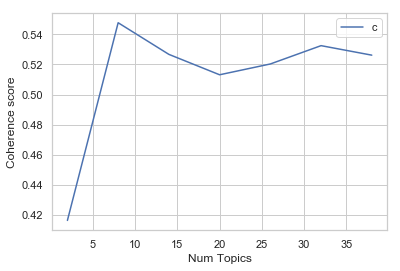

In [80]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [83]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

(u'Num Topics =', 2, u' has Coherence Value of', 0.4163)
(u'Num Topics =', 8, u' has Coherence Value of', 0.5477)
(u'Num Topics =', 14, u' has Coherence Value of', 0.5267)
(u'Num Topics =', 20, u' has Coherence Value of', 0.5131)
(u'Num Topics =', 26, u' has Coherence Value of', 0.5203)
(u'Num Topics =', 32, u' has Coherence Value of', 0.5325)
(u'Num Topics =', 38, u' has Coherence Value of', 0.5262)


## Selecting the optimal number of topics by their coherence score

In [84]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  u'0.038*"product" + 0.036*"system" + 0.020*"segment" + 0.017*"equipment" + 0.014*"industrial" + 0.013*"offer" + 0.012*"manufacture" + 0.012*"market" + 0.011*"control" + 0.011*"power"'),
 (1,
  u'0.030*"company" + 0.030*"treatment" + 0.027*"develop" + 0.016*"pharmaceutical" + 0.015*"development" + 0.014*"patient" + 0.012*"disease" + 0.011*"therapeutic" + 0.010*"research" + 0.010*"clinical"'),
 (2,
  u'0.086*"product" + 0.030*"company" + 0.023*"brand" + 0.021*"sell" + 0.020*"offer" + 0.020*"operate" + 0.019*"market" + 0.014*"store" + 0.014*"include" + 0.014*"retail"'),
 (3,
  u'0.112*"service" + 0.044*"provide" + 0.036*"management" + 0.028*"offer" + 0.021*"segment" + 0.016*"insurance" + 0.014*"include" + 0.014*"health" + 0.013*"care" + 0.010*"company"'),
 (4,
  u'0.120*"company" + 0.071*"base" + 0.034*"change" + 0.032*"corporation" + 0.031*"found" + 0.030*"technology" + 0.029*"formerly_known" + 0.024*"development" + 0.020*"holding" + 0.020*"california"'),
 (5,
  u'0.047*"company" 

## Finding the dominant topic in each sentence (depends on the distribution of keyword specific to that topic)

In [86]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.2027,"company, base, change, corporation, found, tec...","024 Pharma, Inc. provides healthcare products ..."
1,1,2.0,0.5647,"product, company, brand, sell, offer, operate,...","1-800-Flowers.com, Inc., together with its sub..."
2,2,7.0,0.3254,"solution, provide, software, network, service,...","12 Retech Corporation, through its subsidiarie..."
3,3,3.0,0.2461,"service, provide, management, offer, segment, ...","1347 Property Insurance Holdings, Inc., throug..."
4,4,5.0,0.1903,"company, operate, energy, oil, found, gas, wat...","1847 Holdings LLC, through its subsidiaries, p..."
5,5,6.0,0.1793,"loan, commercial, service, business, banking, ...","1867 Western Financial Corporation, through it..."
6,6,7.0,0.6013,"solution, provide, software, network, service,...",1mage Software Inc operates in the technology ...
7,7,4.0,0.1806,"company, base, change, corporation, found, tec...","1PM Industries, Inc. provides consulting servi..."
8,8,6.0,0.5858,"loan, commercial, service, business, banking, ...",1st Capital Bank provides various banking prod...
9,9,6.0,0.5887,"loan, commercial, service, business, banking, ...","1st Colonial Bancorp, Inc. operates as the ban..."


In [113]:
df_dominant_topic['act_label'] = rawdata['label']
df_dominant_topic['desc'] = rawdata['Business Description']

In [155]:
df_dominant_topic.tail(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,act_label,desc
1992,1992,7.0,0.3976,"solution, provide, software, network, service,...","Defentect Group, Inc. develops and provides IP...",Information Technology,"Defentect Group, Inc. develops and provides IP..."
1993,1993,2.0,0.3238,"product, company, brand, sell, offer, operate,...","Del Friscos Restaurant Group, Inc. develops, o...",Consumer Discretionary,"Del Frisco's Restaurant Group, Inc. develops, ..."
1994,1994,2.0,0.3102,"product, company, brand, sell, offer, operate,...","Del Taco Restaurants, Inc. develops, franchise...",Consumer Discretionary,"Del Taco Restaurants, Inc. develops, franchise..."
1995,1995,1.0,0.3596,"company, treatment, develop, pharmaceutical, d...","Delcath Systems, Inc., an interventional oncol...",Healthcare,"Delcath Systems, Inc., an interventional oncol..."
1996,1996,5.0,0.4592,"company, operate, energy, oil, found, gas, wat...","Delek US Holdings, Inc. engages in the integra...",Energy,"Delek US Holdings, Inc. engages in the integra..."
1997,1997,6.0,0.5784,"loan, commercial, service, business, banking, ...",Delhi Bank Corp. operates as a bank holding co...,Banks,Delhi Bank Corp. operates as a bank holding co...
1998,1998,2.0,0.4014,"product, company, brand, sell, offer, operate,...","dELiA*s, Inc. operates as a multi-channel reta...",Catalog Apparel and Accessory Retail,"dELiA*s, Inc. operates as a multi-channel reta..."
1999,1999,7.0,0.4168,"solution, provide, software, network, service,...","Delivery Technology Solutions, Inc. offers res...",Commercial and Professional Services,"Delivery Technology Solutions, Inc. offers res..."
2000,2000,6.0,0.6051,"loan, commercial, service, business, banking, ...",Delmar Bancorp operates as the bank holding co...,Banks,Delmar Bancorp operates as the bank holding co...
2001,2001,6.0,0.5140,"loan, commercial, service, business, banking, ...","Delmarva Bancshares, Inc. operates as the bank...",Banks,"Delmarva Bancshares, Inc. operates as the bank..."


In [158]:
df_dominant_topic[['Keywords','act_label','desc']].head(15)

,Keywords,act_label,desc
0,"company, base, change, corporation, found, tec...",Beauty Care Products,"024 Pharma, Inc. provides healthcare products ..."
1,"product, company, brand, sell, offer, operate,...","Catalog Flowers, Gifts and Novelties","1-800-Flowers.com, Inc., together with its sub..."
2,"solution, provide, software, network, service,...",Information Technology,"12 Retech Corporation, through its subsidiarie..."
3,"service, provide, management, offer, segment, ...",Casualty,"1347 Property Insurance Holdings, Inc., throug..."
4,"company, operate, energy, oil, found, gas, wat...",Commercial and Professional Services,"1847 Holdings LLC, through its subsidiaries, p..."
5,"loan, commercial, service, business, banking, ...",Banks,"1867 Western Financial Corporation, through it..."
6,"solution, provide, software, network, service,...",Application Software,1mage Software Inc operates in the technology ...
7,"company, base, change, corporation, found, tec...",Commercial and Professional Services,"1PM Industries, Inc. provides consulting servi..."
8,"loan, commercial, service, business, banking, ...",Banks,1st Capital Bank provides various banking prod...
9,"loan, commercial, service, business, banking, ...",Banks,"1st Colonial Bancorp, Inc. operates as the ban..."


## Finding the most representative document for each topic (which sentences represents a topic best way)

In [117]:

sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6481,"product, system, segment, equipment, industria...",Dana Incorporated provides drive and motion pr...
1,1.0,0.7103,"company, treatment, develop, pharmaceutical, d...","Agios Pharmaceuticals, Inc., a biopharmaceutic..."
2,2.0,0.6421,"product, company, brand, sell, offer, operate,...","Carters, Inc., together with its subsidiaries,..."
3,3.0,0.6299,"service, provide, management, offer, segment, ...","Cross Country Healthcare, Inc. provides health..."
4,4.0,0.3892,"company, base, change, corporation, found, tec...","Buscar Company focuses on buying, breeding, ra..."
5,5.0,0.6386,"company, operate, energy, oil, found, gas, wat...",Andeavor Logistics LP operates as a diversifie...
6,6.0,0.6892,"loan, commercial, service, business, banking, ...",Citizens First Corporation operates as the ban...
7,7.0,0.6761,"solution, provide, software, network, service,...","Akamai Technologies, Inc. provides cloud servi..."


In [161]:
pred_labels=['Components manufacturer','Biotechnology and healthcare','Facilities','Management firm','Consumer Discretionary','Petroleum','Petroleum','Banking and loans','SW solutions']
            

In [126]:
keywrds=[]

In [127]:
for i in range(len(sent_topics_sorteddf_mallet)):
    keywrds.append(str(sent_topics_sorteddf_mallet['Keywords'][i]))
    


In [128]:
keywrds

['product, system, segment, equipment, industrial, offer, manufacture, market, control, power',
 'company, treatment, develop, pharmaceutical, development, patient, disease, therapeutic, research, clinical',
 'product, company, brand, sell, offer, operate, market, store, include, retail',
 'service, provide, management, offer, segment, insurance, include, health, care, company',
 'company, base, change, corporation, found, technology, formerly_known, development, holding, california',
 'company, operate, energy, oil, found, gas, water, united_state, property, customer',
 'loan, commercial, service, business, banking, account, company, credit, deposit, real_estate',
 'solution, provide, software, network, service, system, application, datum, platform, offer']